In [1]:
from quardTree import Node,QTree
import random
import pandas as pd

# Check whether the size distribution is a powerlaw distribtuion

In [2]:
# # install by `pip install powerlaw`
# import powerlaw
# def check_power_law_distribution(size_distribution):
# #     sizes = list(size_distribution.keys())
# #     counts = [len(i) for i in size_distribution.values()]
#     sizes = []
#     for size, count in size_distribution.items():
#         sizes.extend([size] * len(count))
#     # Fit power law model
#     fit = powerlaw.Fit(sizes, discrete=True)

#     # Plot the distribution and power law fit
#     fit.plot_ccdf(color='r', linewidth=2)
#     # Returns the loglikelihood ratio, and its p-value, between the two distribution fits, 
#     # assuming the candidate distributions are nested.
#     fit.power_law.plot_ccdf(color='g', linestyle='--', ax=plt.gca())

#     # Perform goodness-of-fit test
#     R, p_value = fit.distribution_compare('power_law', 'exponential', normalized_ratio=True)
#     print("p_value: ", p_value)
#     if p_value < 0.05:
#         print("The size distribution is not a good fit for a power law distribution.")
#     else:
#         print("The size distribution is a good fit for a power law distribution.")

#     plt.xlabel('Node Size')
#     plt.ylabel('Complementary Cumulative Distribution Function (CCDF)')
#     plt.title('Size Distribution and Power Law Fit')
#     plt.show()

#Usage:
#size_distribution = find_size(quard1.root)
#check_power_law_distribution(size_distribution)

In [3]:
# import numpy as np
# from scipy.optimize import curve_fit
# def check(size_distribution):
#     x = np.asarray(size_distribution.keys)
#     y = np.asarray(size_distribution.values)

#     sol1 = curve_fit(func_powerlaw, x, y, maxfev=2000 )
#     sol2 = curve_fit(func_powerlaw, x, y, p0 = np.asarray([-1,10**5,0]))

# Simulation

### 1. A simple random choice based on constant probability of divide, weld rate
    constant fracture and weld rate
    random fracture and weld any node

In [4]:
def case_0(quard):
    # nothing happen
    return 

def case_1(quard):
    # divde
    node = random.choices(quard.leaf_list)[0]
    quard.subdivide(node)


def case_2(quard):
    if len(quard.parent_list) == 1 or len(quard.parent_list) == 0:
        return
    # weld
    node = random.choices(quard.parent_list)[0]
    quard.weld(node)

In [5]:
# 0: nothing happen
# 1: fracture
# 2: weld
def split_weld_simulate(spilt_rate, weld_rate, second):
    quard_example = QTree()
    if spilt_rate + weld_rate > 1:
        print("Error: invalid input, possibility larger than 1")
    nothing_rate = 1 - spilt_rate - weld_rate
    population = [0,1,2]
    weights = [nothing_rate, spilt_rate, weld_rate]
    behave = [case_0, case_1, case_2]
    for i in range(10000*second):
        num = random.choices(population, weights)[0]
        behave[num](quard_example)
    quard_example.plot_size_distribution()
    quard_example.binning_plot(50)
    size_distribution = quard_example.size_dist
    #check_power_law_distribution(size_distribution)
    #quard_example.graph()
    return quard_example

sizes:  [1.4210854715202004e-08, 5.6843418860808015e-08, 2.2737367544323206e-07, 9.094947017729282e-07, 3.637978807091713e-06, 1.4551915228366852e-05, 5.820766091346741e-05, 0.00023283064365386963, 0.0009313225746154785, 0.003725290298461914, 0.014901161193847656, 0.059604644775390625, 0.2384185791015625, 0.95367431640625, 3.814697265625, 15.2587890625, 61.03515625, 244.140625, 976.5625, 3906.25, 15625.0, 62500.0, 250000.0]
counts:  [8, 18, 55, 121, 194, 295, 536, 672, 917, 1019, 1227, 1332, 1154, 876, 766, 561, 404, 247, 120, 37, 17, 2, 1]


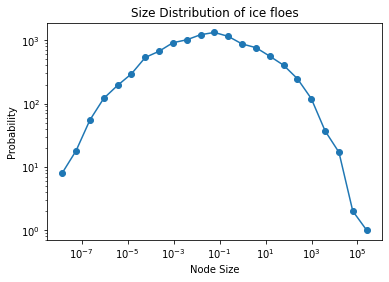

sizes:  [50.0, 100.0, 250.0, 1000.0, 3950.0, 15650.0, 62500.0, 250000.0]
counts:  [9751, 404, 247, 120, 37, 17, 2, 1]


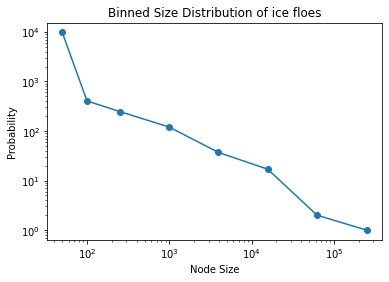

In [6]:
querd0 = split_weld_simulate(0.1,0.03,5)

sizes:  [2.1684043449710089e-13, 8.673617379884035e-13, 3.469446951953614e-12, 1.3877787807814457e-11, 5.551115123125783e-11, 2.220446049250313e-10, 8.881784197001252e-10, 3.552713678800501e-09, 1.4210854715202004e-08, 5.6843418860808015e-08, 2.2737367544323206e-07, 9.094947017729282e-07, 3.637978807091713e-06, 1.4551915228366852e-05, 5.820766091346741e-05, 0.00023283064365386963, 0.0009313225746154785, 0.003725290298461914, 0.014901161193847656, 0.059604644775390625, 0.2384185791015625, 0.95367431640625, 3.814697265625, 15.2587890625, 61.03515625, 244.140625, 976.5625, 3906.25, 15625.0, 250000.0]
counts:  [4, 3, 7, 18, 47, 95, 253, 598, 1065, 1728, 2803, 4436, 6228, 7846, 10079, 11344, 11926, 11678, 10033, 8043, 5943, 4162, 2720, 1786, 972, 446, 159, 46, 13, 1]


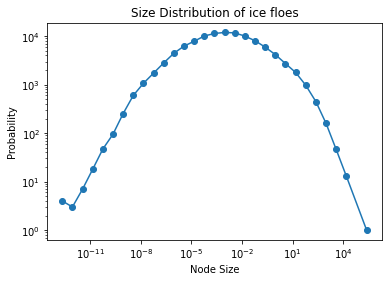

sizes:  [50.0, 100.0, 250.0, 1000.0, 3950.0, 15650.0, 250000.0]
counts:  [102845, 972, 446, 159, 46, 13, 1]


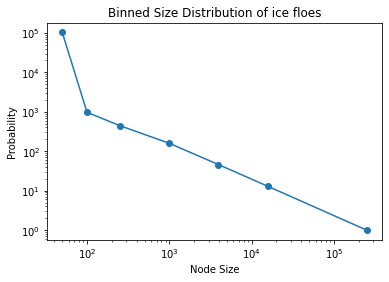

In [7]:
querd1 = split_weld_simulate(0.1,0.03,50)

sizes:  [5.421010862427522e-14, 2.1684043449710089e-13, 8.673617379884035e-13, 3.469446951953614e-12, 1.3877787807814457e-11, 5.551115123125783e-11, 2.220446049250313e-10, 8.881784197001252e-10, 3.552713678800501e-09, 1.4210854715202004e-08, 5.6843418860808015e-08, 2.2737367544323206e-07, 9.094947017729282e-07, 3.637978807091713e-06, 1.4551915228366852e-05, 5.820766091346741e-05, 0.00023283064365386963, 0.0009313225746154785, 0.003725290298461914, 0.014901161193847656, 0.059604644775390625, 0.2384185791015625, 0.95367431640625, 3.814697265625, 15.2587890625, 61.03515625, 244.140625, 976.5625, 3906.25, 15625.0, 250000.0]
counts:  [8, 30, 88, 260, 505, 940, 1693, 3025, 4653, 6757, 9137, 11299, 13389, 14836, 15970, 17204, 17523, 17796, 16958, 15259, 13293, 10678, 7784, 4965, 2885, 1347, 600, 178, 42, 7, 1]


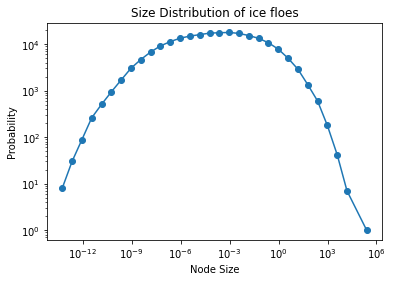

sizes:  [50.0, 100.0, 250.0, 1000.0, 3950.0, 15650.0, 250000.0]
counts:  [206935, 1347, 600, 178, 42, 7, 1]


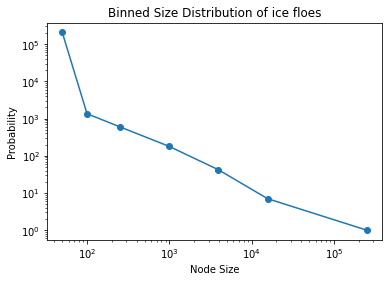

In [8]:
quard2 = split_weld_simulate(0.1,0.03,100)

In [ ]:
querd3 = split_weld_simulate(0.1,0.03,500)

In [ ]:
querd4 = split_weld_simulate(0.1,0.03,50000)

In [ ]:
querd4 = split_weld_simulate(0.1,0.03,50000)